<a href="https://colab.research.google.com/github/pravin-raut/DS-ML/blob/Master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [4]:
X=df.drop(columns=["Outcome"])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y=df['Outcome'].values
y[0:5]

array([1, 0, 1, 0, 1])

In [8]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier


#create KNN Classifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
knn.predict(X_test)[0:5]


array([0, 0, 0, 0, 1])

In [11]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6688311688311688

[0.35064935064935066, 0.2987012987012987, 0.33116883116883117, 0.3181818181818182, 0.2987012987012987, 0.2922077922077922, 0.2792207792207792, 0.2727272727272727, 0.2597402597402597, 0.2662337662337662, 0.2662337662337662, 0.2792207792207792, 0.2597402597402597, 0.2597402597402597, 0.2597402597402597, 0.2662337662337662, 0.2662337662337662, 0.2597402597402597, 0.2662337662337662, 0.2792207792207792, 0.2922077922077922, 0.2727272727272727, 0.2792207792207792, 0.2662337662337662, 0.2727272727272727, 0.2727272727272727, 0.2597402597402597, 0.2727272727272727, 0.2662337662337662, 0.2922077922077922, 0.2857142857142857, 0.2792207792207792, 0.2792207792207792, 0.2857142857142857, 0.2792207792207792, 0.2792207792207792, 0.2857142857142857, 0.3051948051948052, 0.3051948051948052]


Text(0, 0.5, 'Mean Error')

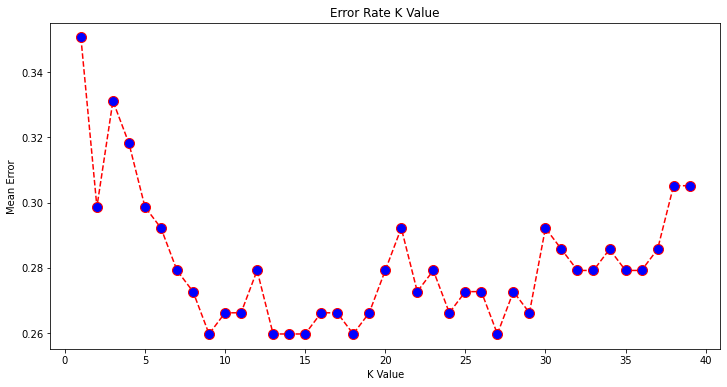

In [14]:
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
print(error)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [21]:
from sklearn.neighbors import KNeighborsClassifier


#create KNN Classifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7402597402597403

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np


#create a new KNN model
knn_cv=KNeighborsClassifier(n_neighbors=2)
#train model with cv of 5
cv_Score=cross_val_score(knn_cv,X,y,cv=5)
print(cv_Score)
print('cv_scores mean:{}'.format(np.mean(cv_Score)))


[0.66883117 0.66883117 0.71428571 0.7254902  0.69281046]
cv_scores mean:0.6940497411085647


In [27]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [28]:
#check top performing n_neighbors value
knn_gscv.best_params_


{'n_neighbors': 14}

In [29]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_


0.7578558696205755

In [26]:
np.arange(1, 25)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])